<a href="https://colab.research.google.com/github/engineereliab076/engineereliab076/blob/main/FACE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

In [ ]:
#import dependencies
import numpy as np
import face_recognition
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#creating the encoding profiles
face_1 = face_recognition.load_image_file('/content/nico jackson.jpg')
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file('/content/billie.jpg')
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file('/content/bellingham.jpg')
face_3_encoding = face_recognition.face_encodings(face_3)[0]

#build arrays

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding
]

known_face_names = [
    'Nicolas Jackson',
    'Billie Eilish',
    'Jude Bellingham'
]

FACE RECOGNITION ON UNKNOWN FACES

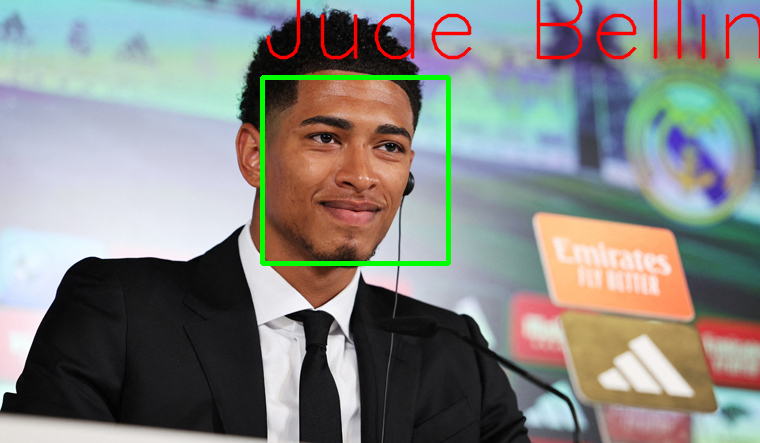

In [ ]:
#read unknown file name
file_name = '/content/unknown jude.jpg'
unknown_img = face_recognition.load_image_file(file_name)
unknown_img_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_img)
face_encodings = face_recognition.face_encodings(unknown_img,face_locations)

for (top,right,bottom,left),face_encoding in zip(face_locations,face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings,face_encoding)

  name = 'unknown'

  face_distances = face_recognition.face_distance(known_face_encodings,face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]

  cv2.rectangle(unknown_img_to_draw,(left,top),(right,bottom),(0,255,0),3)
  cv2.putText(unknown_img_to_draw,name,(left,top-20),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),2,cv2.LINE_AA)

  cv2_imshow(unknown_img_to_draw)
